---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

In this article, a few python *scikit learn* implementations of a few machine learning problems will be discussed, all of them appeared as Lab exercises in the **edX course Microsoft: DAT210x Programming with Python for Data Science**. The problem descriptions are taken straightaway from the course itself.


## SVM vs. KNN
In this exercise, **support vector machine** classifier will be used to classify UCI's **wheat-seeds** dataset. 

1. First, let's *benchmark* how long SVM takes to train and predict with **SVC** relative to how long **K-Neighbors** takes to train and test. 
2. Then compare the *decision boundary* plot produced by the two using the wheat dataset. 

In [4]:
#ipython nbconvert pcaiso.ipynb
%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

# 
# INFO: Your Parameters.
# You can adjust them after completing the lab
C = 1
kernel = 'linear'
iterations = 5000 #20000 #5000   # TODO: Change to 200000 once you get to Question#2

FAST_DRAW = True

def drawPlots(model, wintitle='Figure 1'):
  # INFO: A convenience function for you
  # You can use this to break any higher-dimensional space down
  # And view cross sections of it.

  # If this line throws an error, use plt.style.use('ggplot') instead
  mpl.style.use('ggplot') # Look Pretty

  padding = 3
  resolution = 0.5
  max_2d_score = 0

  y_colors = ['#ff0000', '#00ff00', '#0000ff']
  my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
  colors = [y_colors[i] for i in y_train]
  num_columns = len(X_train.columns)

  fig = plt.figure(figsize=(15, 15))
  fig.canvas.set_window_title(wintitle)
  
  df = pd.DataFrame(columns=('row', 'col', 'score'))
  i = 0
  cnt = 0

  for col in range(num_columns):
    for row in range(num_columns):
        
      # Easy out
      if FAST_DRAW and col > row:
        cnt += 1
        continue

      ax = plt.subplot(num_columns, num_columns, cnt + 1)
      plt.xticks(())
      plt.yticks(())

      # Intersection:
      if col == row:
        plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
        cnt += 1
        continue

      # Only select two features to display, then train the model
      X_train_bag = X_train.ix[:, [row,col]]
      X_test_bag = X_test.ix[:, [row,col]]
      model.fit(X_train_bag, y_train)

      # Create a mesh to plot in
      x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
      y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
      xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

      # Plot Boundaries
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())

      # Prepare the contour
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.5)
      #plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
      plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)

      score = round(model.score(X_test_bag, y_test) * 100, 3)
      plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
      max_2d_score = score if score > max_2d_score else max_2d_score

      cnt += 1
    
      df.loc[i] = [X_train.columns[row], X_train.columns[col], score]
      i += 1

  print "Max 2D Score: ", max_2d_score
  fig.set_tight_layout(True)
  
  return df


def benchmark(model, wintitle='Figure 1'):
  print '\n\n' + wintitle + ' Results'
  s = time.time()
  for i in range(iterations):
    #
    # TODO: train the classifier on the training data / labels:
    #
    # .. your code here ..
    model.fit(X_train, y_train) 
    
  print "{0} Replications Training Time: ".format(iterations), time.time() - s
  train_time = time.time() - s

  s = time.time()
  for i in range(iterations):
    #
    # TODO: score the classifier on the testing data / labels:
    #
    # .. your code here ..
    score=model.score(X_test, y_test) 
  
  print "{0} Replication Scoring Time: ".format(iterations), time.time() - s
  test_time = time.time() - s
    
  print "High-Dimensionality Score: ", round((score*100), 3)
  return  (round((score*100), 3), train_time, test_time)

The following table shows the first few rows of the entire dataset.

In [2]:
# 
# TODO: Load up the wheat dataset into dataframe 'X'
# Verify you did it properly.
# Indices shouldn't be doubled, nor weird headers...
#
# .. your code here ..
X = pd.read_csv('C:/courses/Edx/Past/Microsoft/Microsoft DAT210x Programming with Python for Data Science/Week6/Assignments/Datasets/wheat.data', index_col=0)
X.index.name = None
X.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [3]:
# INFO: An easy way to show which rows have nans in them
#print X[pd.isnull(X).any(axis=1)]
#print X[pd.isnull(X).any(axis=1)]

# 
# TODO: Go ahead and drop any row with a nan
#
# .. your code here ..
#X = X.dropna(axis=1)
X = X.dropna(axis=0)
#print X[pd.isnull(X).any(axis=1)]

# 
# INFO: # In the future, you might try setting the nan values to the
# mean value of that column, the mean should only be calculated for
# the specific class rather than across all classes, now that you
# have the labels

#
# TODO: Copy the labels out of the dset into variable 'y' then Remove
# them from X. Encode the labels, using the .map() trick we showed
# you in Module 5 -- canadian:0, kama:1, and rosa:2
#
# .. your code here ..
y = X['wheat_type'].copy()
X.drop(labels=['wheat_type'], inplace=True, axis=1)
y = y.map({'canadian':0, 'kama':1, 'rosa':2})

As usual, the entire dataset is divided into 2 parts, *70%* as *training* and *30%* as *test* dataset. The first few rows of the training dataset is shown below.

In [4]:
# 
# TODO: Split your data into test / train sets
# Your test size can be 30% with random_state 7.
# Use variable names: X_train, X_test, y_train, y_test
#
# .. your code here ..
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,area,perimeter,compactness,length,width,asymmetry,groove
61,11.23,12.63,0.8840,4.902,2.879,2.269,4.703
116,18.96,16.20,0.9077,6.051,3.897,4.334,5.750
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263
38,14.80,14.52,0.8823,5.656,3.288,3.112,5.309
194,12.11,13.27,0.8639,5.236,2.975,4.132,5.012


The next figure and the results show the performance of the **k-nearest neighbor classifier** in terms of the training / prediction time and the accuracy of prediction, with
1. All the features are used for training and prediction.
2. Only 2 features at a time is used for training and prediction.



KNeighbors Results
5000 Replications Training Time:  1.61899995804
5000 Replication Scoring Time:  2.78100013733
High-Dimensionality Score:  83.607
Max 2D Score:  90.164


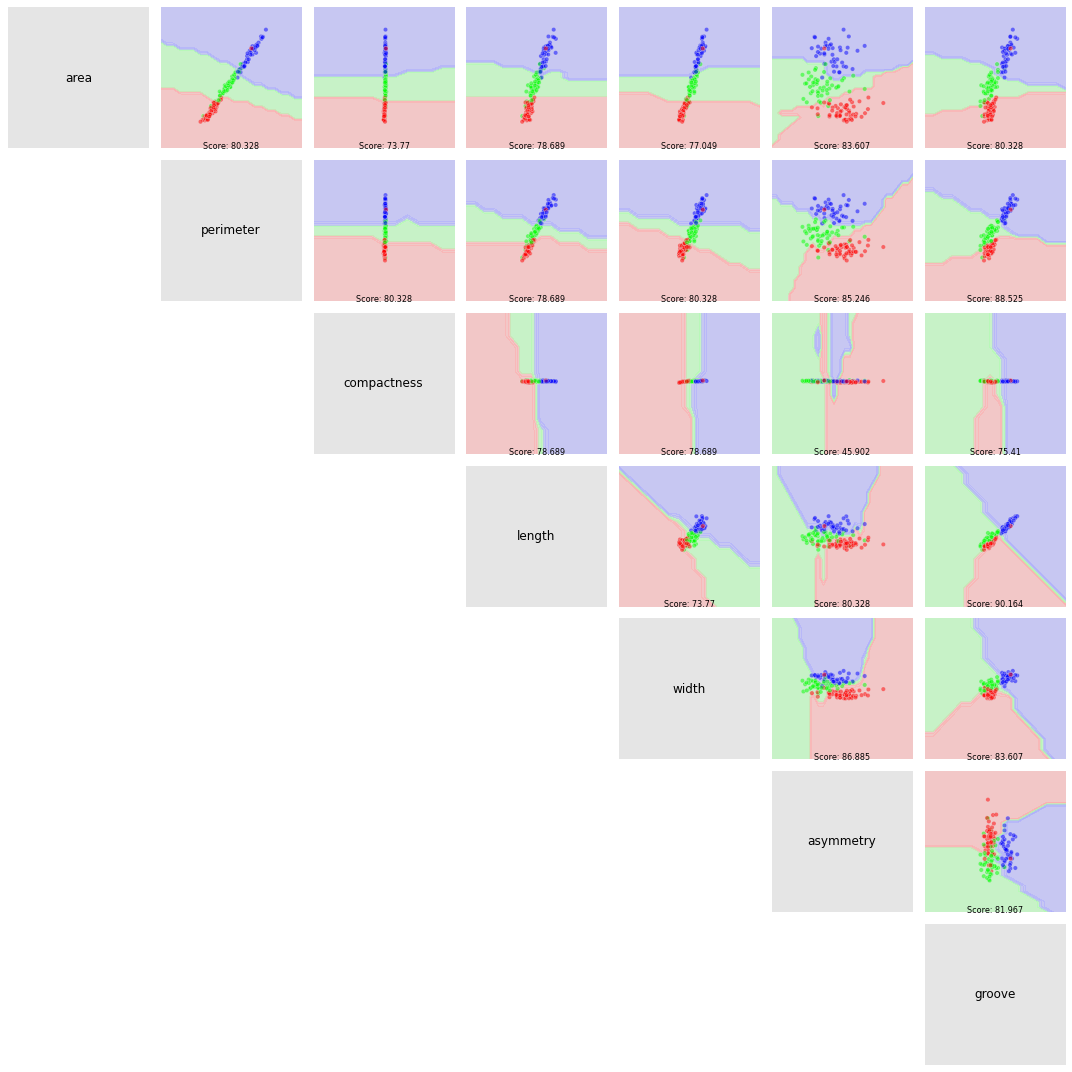

In [15]:
#
# TODO: Create an SVC classifier named svc
# Use a linear kernel, and set the C value to C
#
# .. your code here ..
from sklearn.svm import SVC
svc = SVC(kernel='linear')
SVC(C=C, cache_size=200, class_weight=None, coef0=0.0,
  #decision_function_shape=None, 
  degree=3, gamma='auto', kernel=kernel,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#
# TODO: Create an KNeighbors classifier named knn
# Set the neighbor count to 5
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

benchmark(knn, 'KNeighbors')
df_knn = drawPlots(knn, 'KNeighbors')

plt.show()

Again, the next figure and the results show the performance of the **SVM classifier** (with **linear kernel** and **slcak C=1**) in terms of the training / prediction time and the accuracy of prediction, with
1. All the features are used for training and prediction.
2. Only 2 features at a time is used for training and prediction.

As can be seen, both the **accuracies** (with all the features and maximum accuracy obtained with any 2-features) are **higher** in case of **SVM**. Also, as expected, the training for SVM is slower than KNN but the prediction is faster.



SVC Results
5000 Replications Training Time:  3.09300017357
5000 Replication Scoring Time:  1.27099990845
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


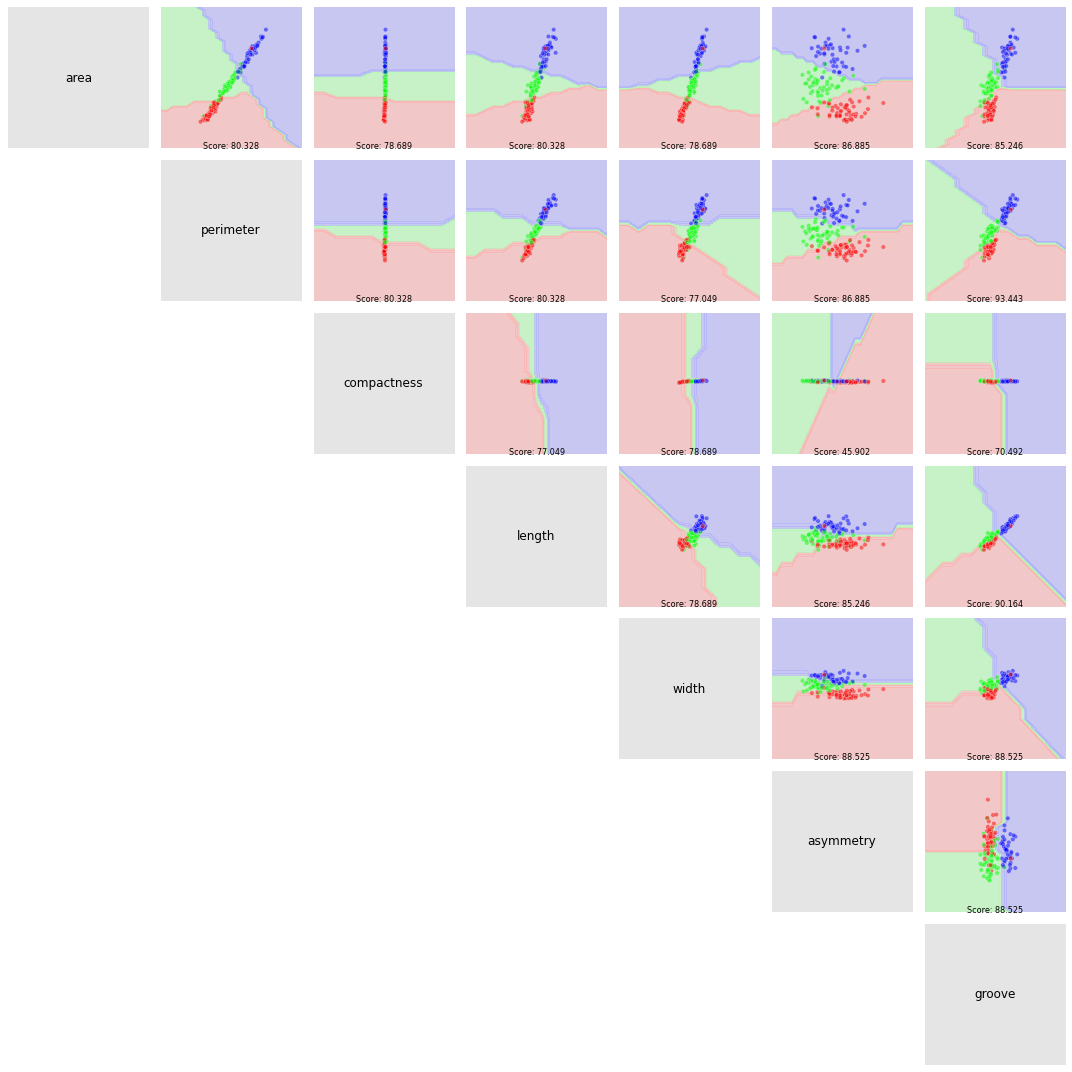

In [16]:
benchmark(svc, 'SVC')
df_SVC = drawPlots(svc, 'SVC')

plt.show()

The following heatmaps show the accuracies of the two classifiers using different 2D features.

## Accuracy (%) of KNN with 2D features

<matplotlib.colorbar.Colorbar instance at 0x000000001A65DF48>

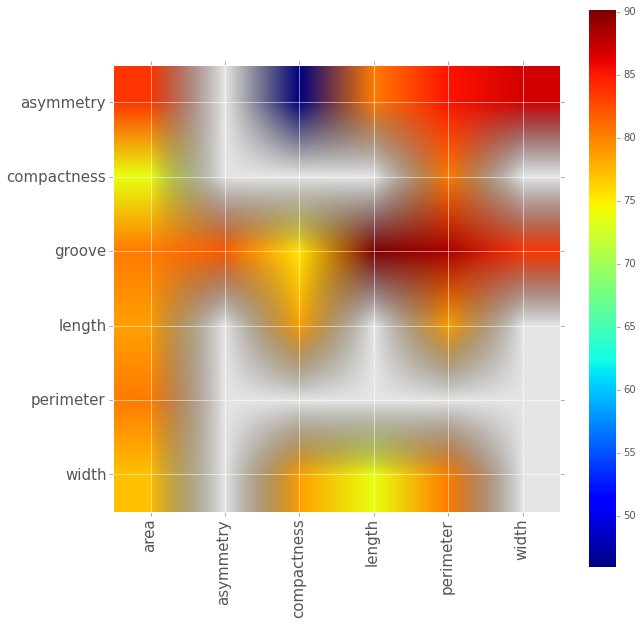

In [7]:
df_knn.head()
df_knn = df_knn.pivot("row", "col", "score")
#print df_knn.shape
fig = plt.figure(figsize=(10, 10))
plt.imshow(df_knn) #.fillna(0))
plt.xticks(range(df_knn.shape[1]), df_knn.columns, rotation=90)
plt.yticks(range(df_knn.shape[0]), df_knn.index)
plt.tick_params(labelsize=15)
plt.colorbar()

## Accuracy (%) of SVM (with linear kernel and slack C=1) with 2D features

<matplotlib.colorbar.Colorbar instance at 0x000000001A8003C8>

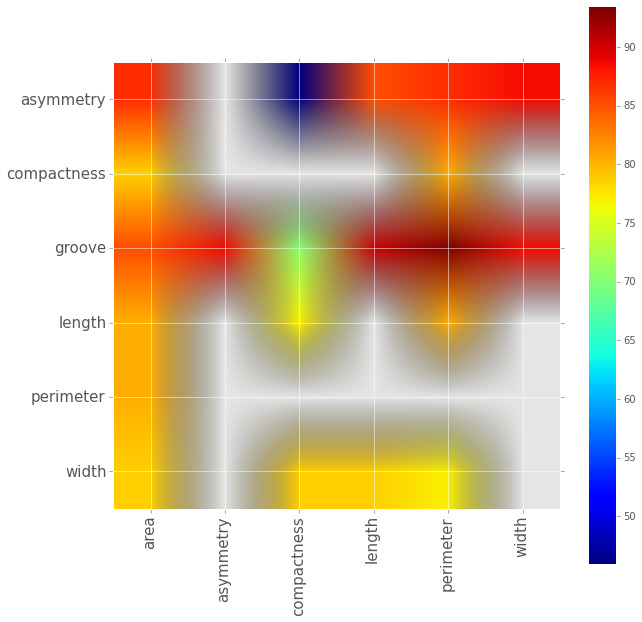

In [8]:
df_SVC.head()
df_SVC = df_SVC.pivot("row", "col", "score")
#print df_knn.shape
fig = plt.figure(figsize=(10, 10))
plt.imshow(df_SVC) #.fillna(0))
plt.xticks(range(df_SVC.shape[1]), df_SVC.columns, rotation=90)
plt.yticks(range(df_SVC.shape[0]), df_SVC.index)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.colorbar()

In [9]:
#
# BONUS: After submitting your answers, toy around with
# gamma, kernel, and C.
i = 0
df = pd.DataFrame(columns=('kernel', 'C', 'score', 'train_time', 'test_time'))
from sklearn.svm import SVC
for kernel in ['linear', 'poly', 'rbf']:
    for C in [10**x for x in range(-3, 4)]:
        svc = SVC(kernel=kernel, C=C)
        s, tr, tst = benchmark(svc, 'SVC')
        df.loc[i] = [kernel, C, s, tr, tst]
        i += 1
df.head()



SVC Results
5000 Iterations Training Time:  3.17899990082
5000 Iterations Scoring Time:  1.76399993896
High-Dimensionality Score:  57.377


SVC Results
5000 Iterations Training Time:  2.6360001564
5000 Iterations Scoring Time:  1.46499991417
High-Dimensionality Score:  86.885


SVC Results
5000 Iterations Training Time:  1.94199991226
5000 Iterations Scoring Time:  1.37600016594
High-Dimensionality Score:  85.246


SVC Results
5000 Iterations Training Time:  2.85500001907
5000 Iterations Scoring Time:  1.26399993896
High-Dimensionality Score:  86.885


SVC Results
5000 Iterations Training Time:  6.32699990273
5000 Iterations Scoring Time:  1.24500012398
High-Dimensionality Score:  91.803


SVC Results
5000 Iterations Training Time:  20.6489999294
5000 Iterations Scoring Time:  1.35899996758
High-Dimensionality Score:  95.082


SVC Results
5000 Iterations Training Time:  28.7049999237
5000 Iterations Scoring Time:  1.19199991226
High-Dimensionality Score:  93.443


SVC Results
5000 It

,kernel,C,score,train_time,test_time
0,linear,0.001,57.377,3.179,1.764
1,linear,0.010,86.885,2.636,1.465
2,linear,0.100,85.246,1.942,1.376
3,linear,1.000,86.885,2.855,1.264
4,linear,10.000,91.803,6.327,1.245


## Accuracy (%) of SVM (with different kernels and slack variable values) with all features

C,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
kernel,,,,,,,
linear,57.377,86.885,85.246,86.885,91.803,95.082,93.443
poly,88.525,93.443,90.164,90.164,93.443,93.443,93.443
rbf,29.508,29.508,86.885,86.885,85.246,88.525,86.885


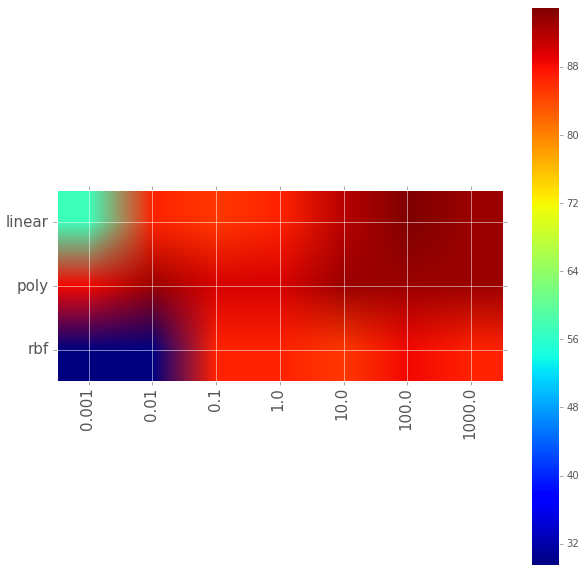

In [10]:
df1 = df.pivot("kernel", "C", "score")
fig = plt.figure(figsize=(10, 10))
plt.imshow(df1) #.fillna(0))
plt.xticks(range(df1.shape[1]), df1.columns, rotation=90)
plt.yticks(range(df1.shape[0]), df1.index)
plt.tick_params(labelsize=15)
plt.colorbar()
df1.head()

## Training time (with replications) for SVM in seconds (with different kernels and slack variable values) with all features

C,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
kernel,,,,,,,
linear,3.179,2.636,1.942,2.855,6.327,20.649,28.705
poly,3.828,9.994,31.531,65.456,131.638,132.218,130.544
rbf,6.322,5.804,4.543,2.992,3.257,3.212,3.724


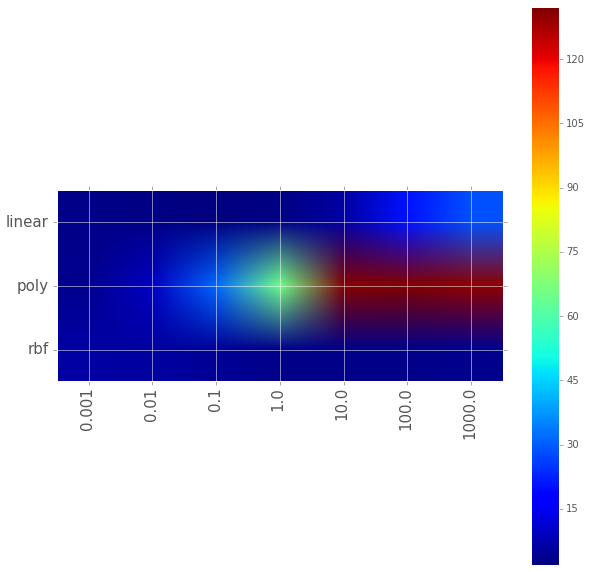

In [11]:
df1 = df.pivot("kernel", "C", "train_time")
fig = plt.figure(figsize=(10, 10))
plt.imshow(df1) #.fillna(0))
plt.xticks(range(df1.shape[1]), df1.columns, rotation=90)
plt.yticks(range(df1.shape[0]), df1.index)
plt.tick_params(labelsize=15)
plt.colorbar()
df1.head()

## Test time (with replications) for SVM in seconds (with different kernels and slack variable values) with all features

C,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
kernel,,,,,,,
linear,1.764,1.465,1.376,1.264,1.245,1.359,1.192
poly,1.285,1.246,1.255,1.254,1.233,1.226,1.236
rbf,2.336,2.641,2.084,1.683,1.769,1.457,1.454


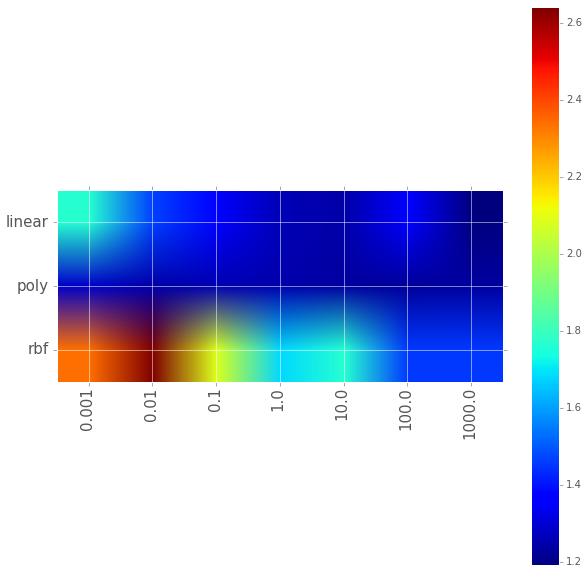

In [13]:
df1 = df.pivot("kernel", "C", "test_time")
fig = plt.figure(figsize=(10, 10))
plt.imshow(df1) #.fillna(0))
plt.xticks(range(df1.shape[1]), df1.columns, rotation=90)
plt.yticks(range(df1.shape[0]), df1.index)
plt.tick_params(labelsize=15)
plt.colorbar()
df1.head()

# Handwritten-Digits Classification with SVM

Even though the United States Postal Service, as an organization, was formed in 1971, it traces its roots back to the Post Office Department, an organization formed in 1792 by President Benjamin Franklin. It later evolved into a cabinet-level department in 1872, before finally being transformed into the USPS we know today in 1971, as an agency of the U.S. government.

Back in the day, all mail was hand read and delivered. Even up the turn of the 20th century, antiquated techniques such as the pigeonhole method from colonial times were used for mail-handling. During the 1950's, the post office started intense research on the coding systems used in many other countries and started down the process of automation. In 1982, the first computer-driven, OCR machine got installed in Los Angeles, and by the end of 1984, over 250 OCRs machines were installed in 118 major mail processing centers across the country and were processing an average of 6,200 pieces of mail per hour.

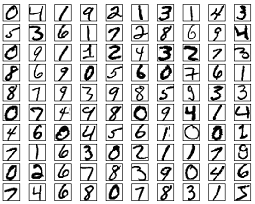

In [8]:
from IPython.display import Image
Image(filename='C:/courses/Edx/Past/Microsoft/Microsoft DAT210x Programming with Python for Data Science/Week6/Assignments/im1.png', width=500, height=500)

Nowadays, the Postal Service is one of the world leaders in optical character recognition technology with machines reading nearly +98 percent of all hand-addressed letter mail and +99.5 percent of machine-printed mail, with a single tray sorting machines capable of sorting more than 18 million trays of mail per day.

Let's train a **support vector classifier** in a few seconds using machine learning, and compute the classification **accuracy** and compare with the advertised USPS stats. For this lab, we shall use of the *Optical Recognition of Handwritten Digits* dataset, provided courtesy of UCI's Machine Learning Repository.

Train your SVC classifier with the parameters provided, and keep testing until you're able to beat the classification abilities of the USPS.

Remember how important having a lot of samples is for machine learning? Try tossing out 96% of your samples, and see how it affects the accuracy of your highest accuracy support vector classifier.

In [39]:
# The Dataset comes from:
# https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits


# At face value, this looks like an easy lab;
# But it has many parts to it, so prepare yourself before starting...


def load(path_test, path_train):
  # Load up the data.
  # You probably could have written this..
  with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
  with open(path_train, 'r') as f: training = pd.read_csv(f)

  # The number of samples between training and testing can vary
  # But the number of features better remain the same!
  n_features = testing.shape[1]

  X_test  = testing.ix[:,:n_features-1]
  X_train = training.ix[:,:n_features-1]
  y_test  = testing.ix[:,n_features-1:].values.ravel()
  y_train = training.ix[:,n_features-1:].values.ravel()

  #
  # Special:
  num_train = int(round(0.04*X_train.shape[0]))
  print num_train
  X_train = X_train.ix[:(num_train-1),:]
  y_train = y_train[:num_train]
  
  return X_train, X_test, y_train, y_test


def peekData():
  # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
  print "Peeking your data..."
  fig = plt.figure(figsize=(10, 10))

  cnt = 0
  for col in range(5):
    for row in range(10):
      plt.subplot(5, 10, cnt + 1)
      plt.imshow(X_train.ix[cnt,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
      plt.axis('off')
      cnt += 1
  fig.set_tight_layout(True)
  plt.show()


def drawPredictions():
  fig = plt.figure(figsize=(10, 10))

  # Make some guesses
  y_guess = model.predict(X_test)


  #
  # INFO: This is the second lab we're demonstrating how to
  # do multi-plots using matplot lab. In the next assignment(s),
  # it'll be your responsibility to use this and assignment #1
  # as tutorials to add in the plotting code yourself!
  num_rows = 10
  num_cols = 5

  index = 0
  for col in range(num_cols):
    for row in range(num_rows):
      plt.subplot(num_cols, num_rows, index + 1)

      # 8x8 is the size of the image, 64 pixels
      plt.imshow(X_test.ix[index,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

      # Green = Guessed right
      # Red = Fail!
      fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
      plt.title('Label: %i' % y_guess[index], fontsize=12, color=fontcolor)
      plt.axis('off')
      index += 1
  fig.set_tight_layout(True)
  plt.show()


153
Peeking your data...


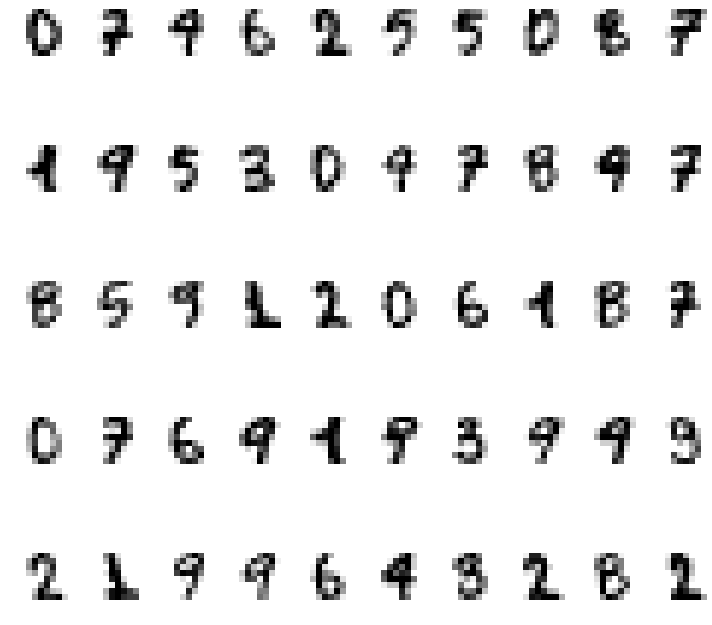

In [37]:
#
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and change your SVC's kernel to 'poly' and re-run your lab
# again.



#
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and change your SVC's kernel to 'rbf' and re-run your lab
# again.



#
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and tinker with your gamma value and C value until you're able
# to beat the USPS. Don't stop tinkering until you do. =).


#################################################

#
# TODO: Once you're able to beat the +98% accuracy score of the
# USPS, go back into the load() method. Look for the line that
# reads "# Special:"
#
# Immediately under that line, alter X_train and y_train ONLY.
# Keep just the ___FIRST___ 4% of the samples. In other words,
# for every 100 samples found, throw away 96 of them. Make sure
# all the samples (and labels) you keep come from the start of
# X_train and y_train.

# If the first 4% is a decimal number, then use int + ceil to
# round up to the nearest whole integer.

# That operation might require some Pandas indexing skills, or
# perhaps some numpy indexing skills if you'd like to go that
# route. Feel free to ask on the class forum if you want; but
# try to exercise your own muscles first, for at least 30
# minutes, by reviewing the Pandas documentation and stack
# overflow. Through that, in the process, you'll pick up a lot.
# Part of being a machine learning practitioner is know what
# questions to ask and where to ask them, so this is a great
# time to start!

# Re-Run your application after throwing away 96% your training
# data. What accuracy score do you get now?




#
# TODO: Lastly, change your kernel back to linear and run your
# assignment one last time. What's the accuracy score this time?
# Surprised?
#
# TODO: Pass in the file paths to the .tes and the .tra files
X_train, X_test, y_train, y_test = load('C:/courses/Edx/Past/Microsoft/Microsoft DAT210x Programming with Python for Data Science/Week6/Assignments/Datasets/optdigits.tes', 'C:/courses/Edx/Past/Microsoft/Microsoft DAT210x Programming with Python for Data Science/Week6/Assignments/Datasets/optdigits.tra')

import matplotlib.pyplot as plt
from sklearn import svm

# 
# Get to know your data. It seems its already well organized in
# [n_samples, n_features] form. Our dataset looks like (4389, 784).
# Also your labels are already shaped as [n_samples].
peekData()

Training SVC Classifier...
{'kernel': 'linear', 'C': 0.01, 'gamma': 1e-06}
0.915032679739
[mean: 0.65359, std: 0.04445, params: {'kernel': 'linear', 'C': 0.0001, 'gamma': 1e-06}, mean: 0.12418, std: 0.00493, params: {'kernel': 'poly', 'C': 0.0001, 'gamma': 1e-06}, mean: 0.12418, std: 0.00493, params: {'kernel': 'rbf', 'C': 0.0001, 'gamma': 1e-06}, mean: 0.65359, std: 0.04445, params: {'kernel': 'linear', 'C': 0.0001, 'gamma': 1e-05}, mean: 0.12418, std: 0.00493, params: {'kernel': 'poly', 'C': 0.0001, 'gamma': 1e-05}, mean: 0.12418, std: 0.00493, params: {'kernel': 'rbf', 'C': 0.0001, 'gamma': 1e-05}, mean: 0.65359, std: 0.04445, params: {'kernel': 'linear', 'C': 0.0001, 'gamma': 0.0001}, mean: 0.12418, std: 0.00493, params: {'kernel': 'poly', 'C': 0.0001, 'gamma': 0.0001}, mean: 0.12418, std: 0.00493, params: {'kernel': 'rbf', 'C': 0.0001, 'gamma': 0.0001}, mean: 0.65359, std: 0.04445, params: {'kernel': 'linear', 'C': 0.0001, 'gamma': 0.001}, mean: 0.12418, std: 0.00493, params: {'ke

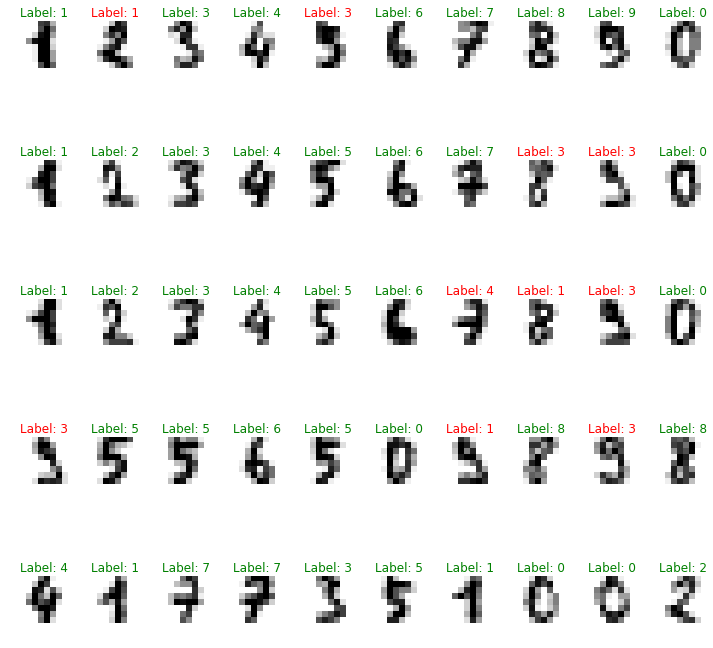

In [44]:
#
# TODO: Create an SVC classifier. Leave C=1, but set gamma to 0.001
# and set the kernel to linear. Then train the model on the testing
# data / labels:
print "Training SVC Classifier..."
#
# .. your code here ..
C = 1 #1
gamma = 0.001
#kernel = 'linear'
#kernel = 'poly'
#kernel = 'rbf'
from sklearn.svm import SVC
model = SVC(kernel=kernel)

from sklearn.grid_search import GridSearchCV
params = {"kernel":['linear','poly','rbf'], "C":[10**x for x in range(-4, 6)], "gamma":[10**x for x in range(-6, 1)]}
grid_search = GridSearchCV(model, params)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)
print grid_search.best_params_
print grid_search.best_score_
print grid_search.grid_scores_
print dir(grid_search)

model = SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
model.fit(X_train, y_train)


# TODO: Calculate the score of your SVC against the testing data
print "Scoring SVC Classifier..."
#
# .. your code here ..
score = model.score(X_test, y_test)
print "Score:\n", score


# Visual Confirmation of accuracy
drawPredictions()

1000th test label:  4
1000th test prediction:  [4]


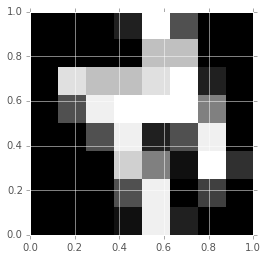

In [34]:
#
# TODO: Print out the TRUE value of the 1000th digit in the test set
#
# .. your code here ..
true_1000th_test_value = y_test[1000]
print "1000th test label: ", true_1000th_test_value


#
# TODO: Predict the value of the 1000th digit in the test set.
# Was your model's prediction correct?
# INFO: If you get a warning on your predict line, look at the
# notes from the previous module's labs.


#
# .. your code here ..
guess_1000th_test_value = model.predict(X_test.iloc[1000])
print "1000th test prediction: ", guess_1000th_test_value


#
# TODO: Use IMSHOW to display the 1000th test image, so you can
# visually check if it was a hard image, or an easy image
#
# .. your code here ..
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(X_test.iloc[1000].reshape(8,8), cmap=plt.cm.gray, interpolation='nearest', origin='lower', extent=[0,1,0,1])